### Setup

apt install requirements

In [1]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
libgl1-mesa-dev set to manually installed.
software-properties-common is already the newest version (0.96.24.32.18).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
Suggested packages:
  glew-utils
The following NEW packages will be installed:
  libgl1-mesa-glx libglew-dev libglew2.0 libosmesa6 libosmesa6-dev
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,916 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-glx amd64 20.0.8-0ubuntu1~18.04.1 [5,532 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libglew2.0 amd64 2.0.0-5 [140 kB]
Get:3 http://archive.

Clone repo and install dependencies

In [2]:
%cd /content

## TODO: use when repo is public
# !git clone https://github.com/jannerm/diffuser.git
## backup for private repo
!curl -L -o diffuser.zip https://www.dropbox.com/s/fe1scd8m2jf7zvj/diffuser.tar?dl=1
!tar -xf diffuser.zip
## /TODO

%cd diffuser
%pip install -f https://download.pytorch.org/whl/torch_stable.html \
                typed-argument-parser \
                scikit-image==0.17.2 \
                scikit-video==1.1.11 \
                gitpython \
                einops \
                pillow \
                free-mujoco-py \
                gym \
                git+https://github.com/JannerM/d4rl.git@0e84a4d29db3ae501043215ce1d91843929f1949 \
                git+https://github.com/aravindr93/mjrl

%pip install -e .

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   136    0   136    0     0    116      0 --:--:--  0:00:01 --:--:--   116
100   363  100   363    0     0    215      0  0:00:01  0:00:01 --:--:--     0
100  592M  100  592M    0     0  9162k      0  0:01:06  0:01:06 --:--:-- 10.9M
/content/diffuser
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/JannerM/d4rl.git (to revision 0e84a4d29db3ae501043215ce1d91843929f1949) to /tmp/pip-req-build-pq9yl80t
  Running command git clone -q https://github.com/JannerM/d4rl.git /tmp/pip-req-build-pq9yl80t
  Running command git rev-parse -q --verify 'sha^0e84a4d29db3ae501043215ce1d91843929f1949'
  Running command git fetch -q https://github.com/JannerM/d4rl.git 0e84a4d29db3ae501043215ce1d91843929f1949
  Running command git checkout -q 0e84a4d29db3ae501043215ce1d91843929f1949
  Clonin

Obtaining file:///content/diffuser
  Running setup.py develop for diffuser


In [7]:
## cythonize mujoco-py at first import
import diffuser.utils as utils

# import importlib
# importlib.reload(utils.colab)

### Conditional sampling

In [8]:
class Args:
  # loadpath = 'logs/azure/hopper-medium-expert-v2/diffusion/H128_T100'
  loadpath = '../logs/pretrained/walker2d-medium-expert-v2/diffusion/defaults_H32_T20'
  # loadpath = '../logs/pretrained/hopper-medium-expert-v2/diffusion/H128_T100'
  diffusion_epoch = 'latest'
  n_samples = 4
  device = 'mps:0'
    
args = Args()

Load diffusion model from disk

In [9]:
%cd /content/diffuser

diffusion_experiment = utils.load_diffusion(
    args.loadpath, epoch=args.diffusion_epoch)

dataset = diffusion_experiment.dataset
renderer = diffusion_experiment.renderer
model = diffusion_experiment.trainer.ema_model

[Errno 2] No such file or directory: '/content/diffuser'
/Users/grayson/Documents/Projects/diffuser-IMLE/scripts
[ utils/serialization ] Loaded config from ../logs/pretrained/walker2d-medium-expert-v2/diffusion/defaults_H32_T20/dataset_config.pkl

[utils/config ] Config: <class 'diffuser.datasets.sequence.SequenceDataset'>
    env: walker2d-medium-expert-v2
    horizon: 32
    max_path_length: 1000
    normalizer: GaussianNormalizer
    preprocess_fns: []
    use_padding: True

[ utils/serialization ] Loaded config from ../logs/pretrained/walker2d-medium-expert-v2/diffusion/defaults_H32_T20/render_config.pkl

[utils/config ] Config: <class 'diffuser.utils.rendering.MuJoCoRenderer'>
    env: walker2d-medium-expert-v2

[ utils/serialization ] Loaded config from ../logs/pretrained/walker2d-medium-expert-v2/diffusion/defaults_H32_T20/model_config.pkl

[utils/config ] Config: <class 'diffuser.models.temporal.TemporalUnet'>
    attention: False
    cond_dim: 17
    dim_mults: (1, 2, 4, 8)
  

load datafile: 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


[ datasets/buffer ] Finalized replay buffer | 2190 episodes
[ datasets/buffer ] Fields:
    actions: (2190, 1000, 6)
    infos/action_log_probs: (2190, 1000, 1)
    infos/qpos: (2190, 1000, 9)
    infos/qvel: (2190, 1000, 9)
    next_observations: (2190, 1000, 17)
    observations: (2190, 1000, 17)
    rewards: (2190, 1000, 1)
    terminals: (2190, 1000, 1)
    timeouts: (2190, 1000, 1)
    normed_observations: (2190, 1000, 17)
    normed_actions: (2190, 1000, 6)
[ utils/config ] Skipping device transfer for: SequenceDataset
Creating offscreen glfw
[ utils/config ] Skipping device transfer for: MuJoCoRenderer
[ models/temporal ] Channel dimensions: [(23, 32), (32, 64), (64, 128), (128, 256)]
[(23, 32), (32, 64), (64, 128), (128, 256)]
[ utils/config ] Moving TemporalUnet to device: cuda
[ utils/config ] Moving GaussianDiffusion to device: cuda
[ utils/config ] Skipping device transfer for: Trainer

[ utils/serialization ] Loading model epoch: 800000



Initialize environment

In [15]:
env = dataset.env
obs = env.reset()

Run reverse diffusion

In [16]:
diffusion_chain = utils.colab.run_diffusion(
    model, dataset, obs, args.n_samples, args.device)
print(diffusion_chain.shape)

(21, 4, 32, 17)


Render the samples

In [17]:
samples = diffusion_chain[-1]
utils.colab.show_sample(renderer, samples, savebase='/tmp/videos')
# utils.colab.show_sample(renderer, samples)

Render the full reverse diffusion process for the first sample.

This renders `horizon * n_diffusion_steps` images, so takes a few minutes. Increasing `substep` will speed up the video generation, but cause it to skip frames.

In [18]:
utils.colab.show_diffusion(renderer, diffusion_chain[:,:1], substep=1, savebase='/tmp/videos')

100%|██████████| 21/21 [00:05<00:00,  3.59it/s]


Now let's run diffusion with different horizons


In [11]:
horizons = [16, 128, 256, 512, 1024]
diffusion_chains = [
      utils.colab.run_diffusion(
          model, dataset, obs, n_samples=1, device=args.device, horizon=horizon
      )
      for horizon in horizons
]

for horizon, diffusion_chain in zip(horizons, diffusion_chains):
  print(f'horizon = {horizon} | samples shape = {diffusion_chain.shape}')

horizon = 16 | samples shape = (21, 1, 16, 17)
horizon = 128 | samples shape = (21, 1, 128, 17)
horizon = 256 | samples shape = (21, 1, 256, 17)
horizon = 512 | samples shape = (21, 1, 512, 17)
horizon = 1024 | samples shape = (21, 1, 1024, 17)


The default model was trained on trajectories of length 128, but can produce trajectories of any length in a constant number of diffusion steps

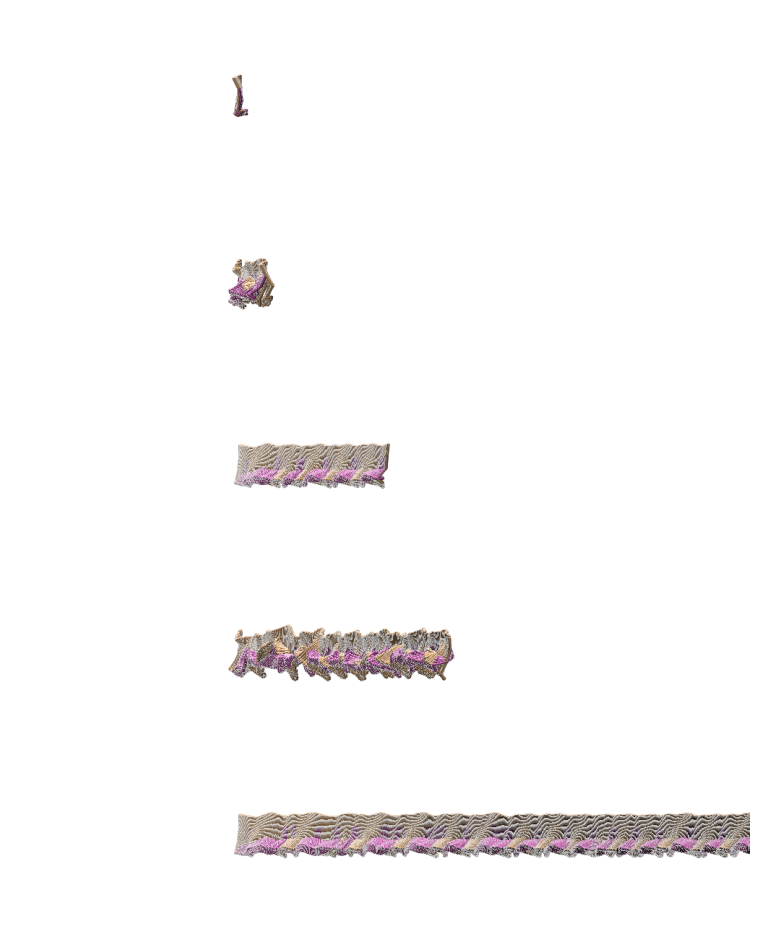

In [13]:
utils.colab.show_samples(renderer, diffusion_chains)